(compressed-air)=
# Energieeffiziente Druckluftsysteme

## Lernziele

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>Lernziele für diese Einheit:</b></div>
    <ul>
        <li> Funktionsweise von Druckluftsystemen verstehen </li>
        <li> mithilfe von Systemübersichten und Energiedaten </li>
        <li> um Energieeffizienzpotenziale und Klimawirkung von Druckluftsystemen bewerten und optimieren zu können </li>
    </ul>
</div>

## python konfigurieren

### Module importieren

In [21]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
import pandas as pd
#import datetime as dt
#import holidays
import seaborn as sns
#import plotly
#import plotly.graph_objects as go
#import sys
#import os
import locale
##import schemdraw
##import schemdraw.elements as elm
##from schemdraw import flow
import distutils.spawn
from distutils.spawn import find_executable

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
#print('datetime', dt)
#print('holidays', holidays.__version__)
print('seaborn', sns.__version__)
#print('plotly', plotly.__version__)
#print('sys', sys.version)
#print('os', os)
print('locale', locale)
print('distutils.spawn',distutils.spawn)
##print('schemdraw', schemdraw.__version__)

Versionen der verwendeten python-Module: 
numpy 1.21.5
matplotlib 3.5.2
pandas 1.4.4
seaborn 0.11.2
locale <module 'locale' from '/home/franzi/.pyenv/versions/miniconda-latest/envs/22sye/lib/python3.10/locale.py'>
distutils.spawn <module 'distutils.spawn' from '/home/franzi/.pyenv/versions/miniconda-latest/envs/22sye/lib/python3.10/site-packages/setuptools/_distutils/spawn.py'>


### Grafikparameter einstellen

In [22]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

## Welche Anwendungen benötigen Druckluft?

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Nennen Sie 5 Beispielanwendungen für Druckluft. 
</div>

*Antwort:...*

Druckluft ist weitgehend gefahrlos (im Gegensatz zu Hydrauliköl), geruchlos und sauber. Alternativlos um empfindliche Sensoren abzublasen, Staub aus verwinkelten Werkstücken zu holen oder um Rohlinge für Kunststoffteile aufzublasen {cite:p}`petermann_erfolgreiches_2018`.

### Beispiel: Optische Geräte berührungslos reinigen

Linsen und andere optische Bauteile in staubigen Umgebungen zu reinigen, gelingt mit Druckluft.

### Beispiel: Wellpappeherstellung

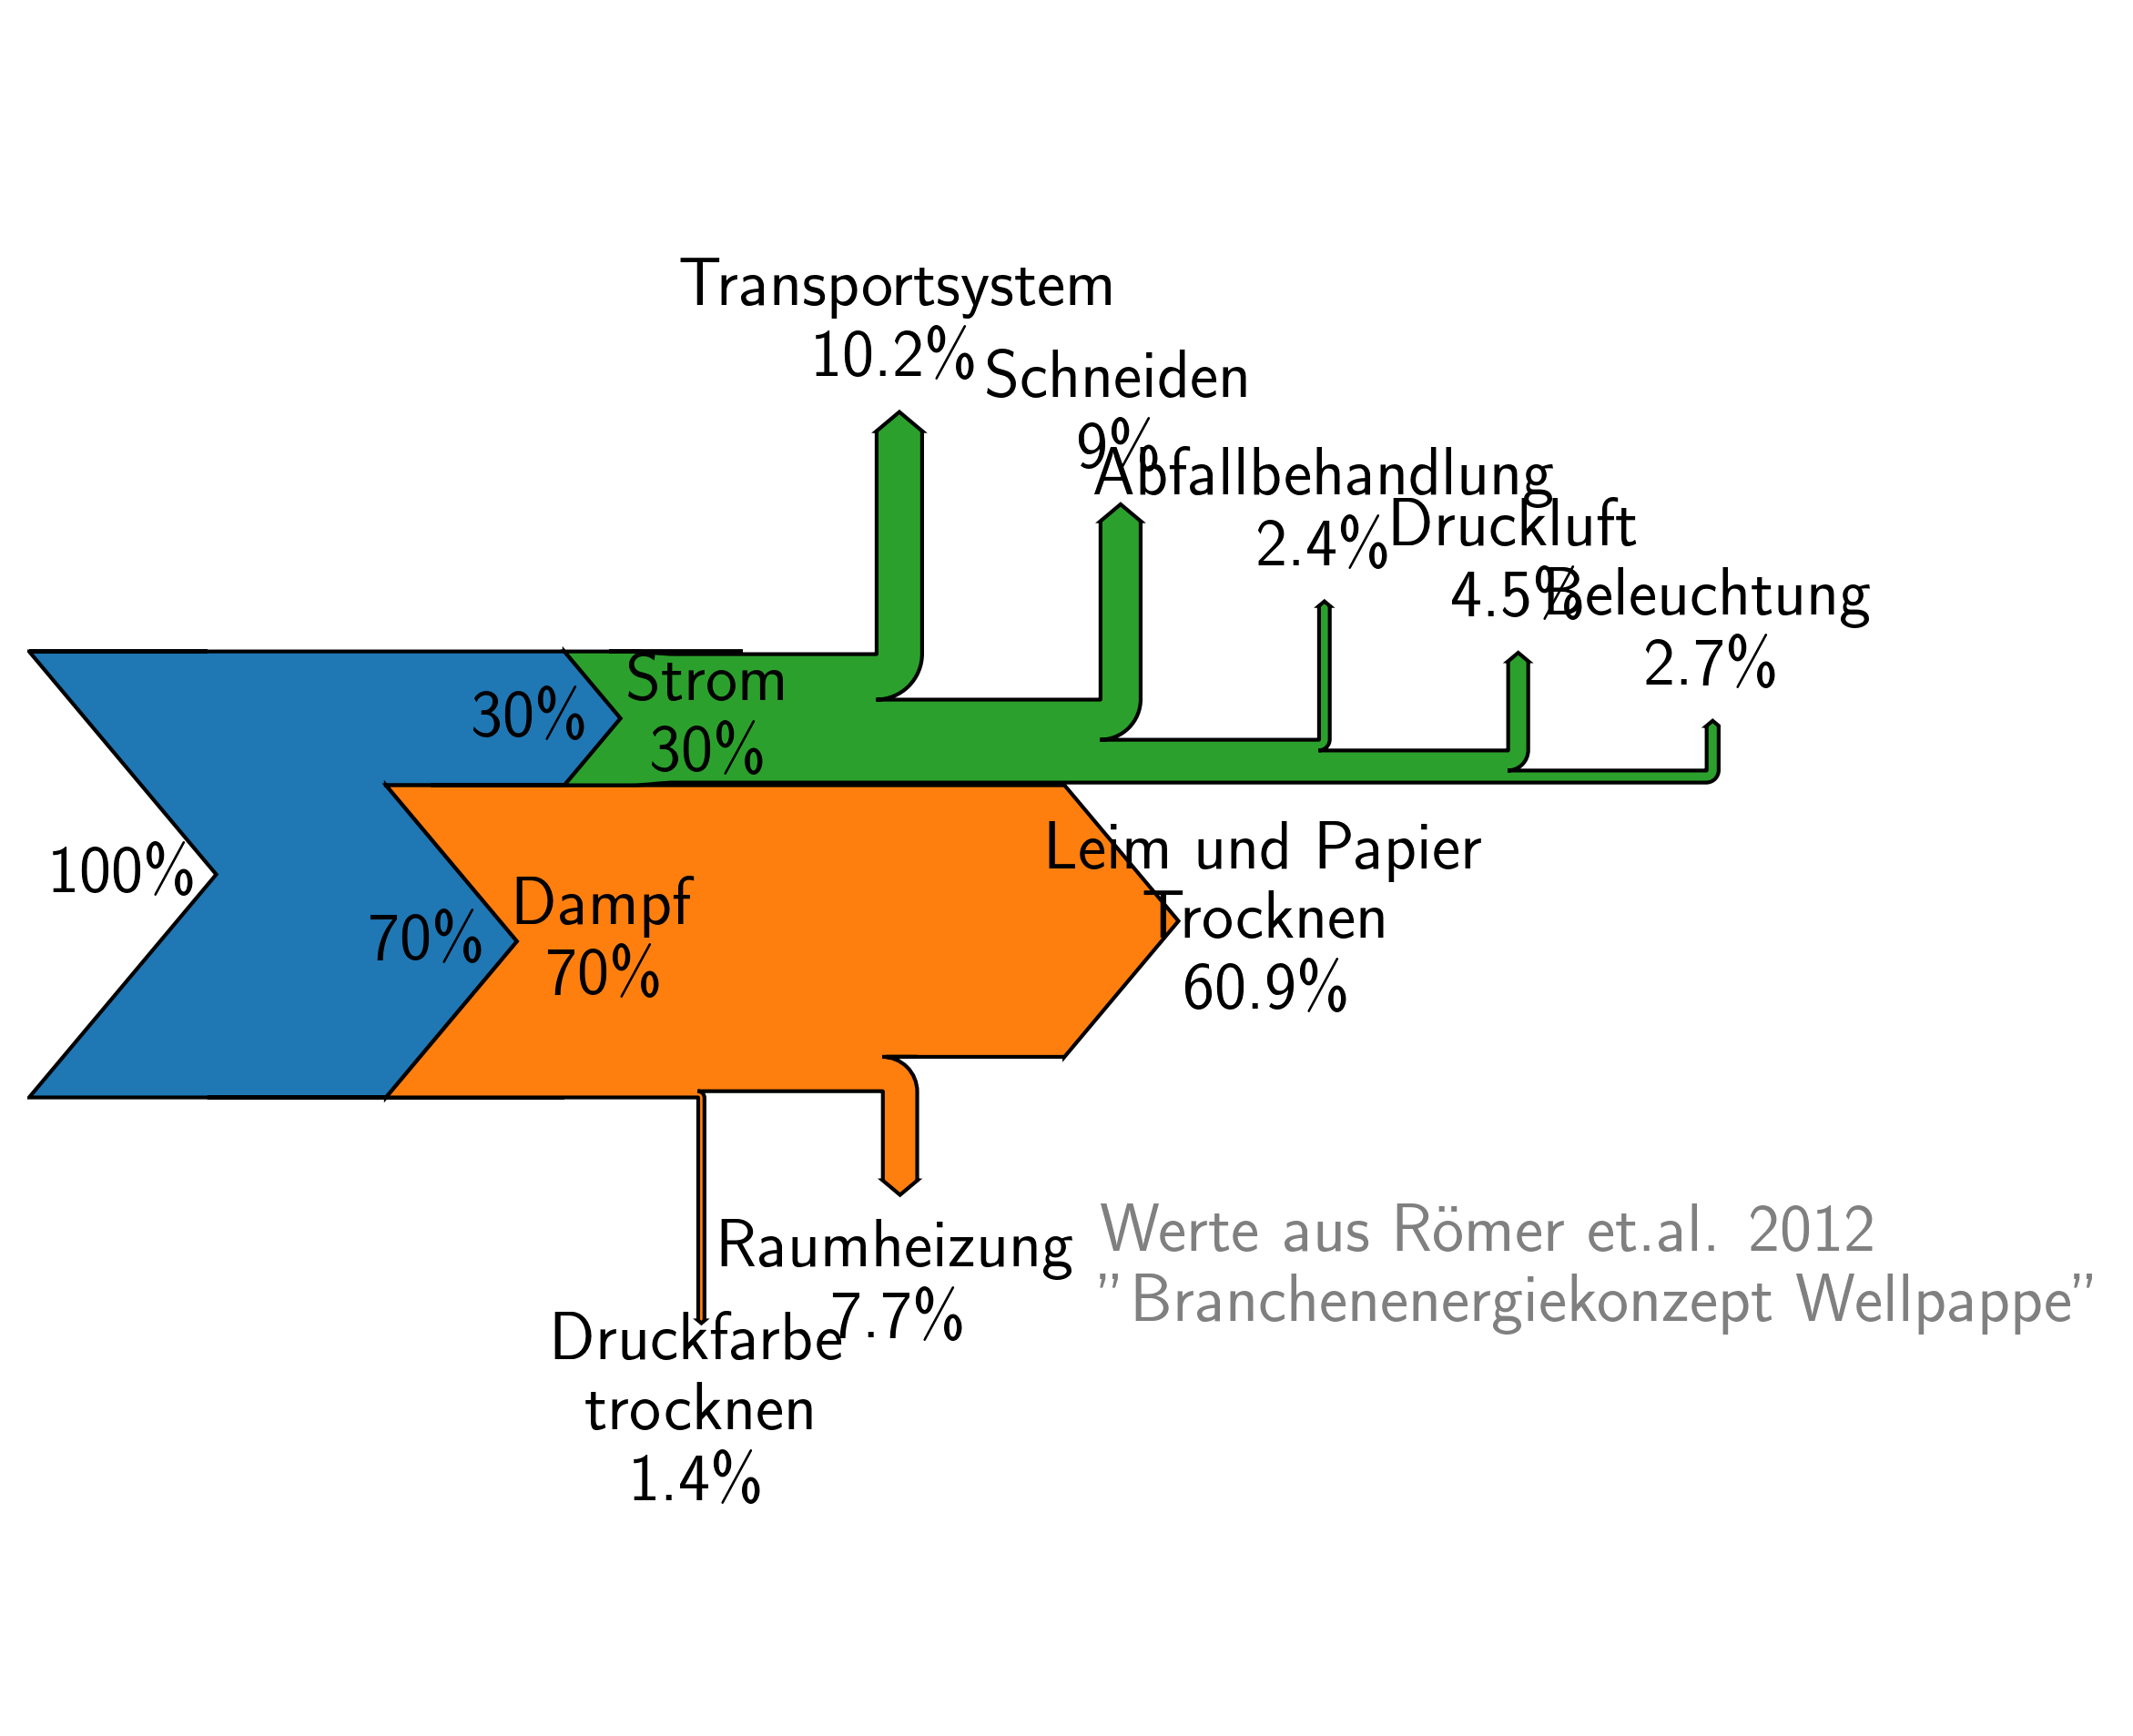

In [23]:
steam = 70
electric = 30
heatingmaterial = steam*0.87
inkdryer = steam*0.02
heatingspace = steam*.11
transport = electric*.34
cutting = electric*.3
garbage = electric*.08
compressedair = electric*.15
illumination = electric*.09
fig, ax = plt.subplots(figsize = [8,8], dpi=300)
cardboard = Sankey(unit='\%', offset = 20, gap = 40, ax=ax)
cardboard.add(flows = [100, -electric, -steam], 
              trunklength = 200,
             orientations = [0, 0, 0],
            labels = ['', 'Strom', 'Dampf'])
cardboard.add(flows = [steam, -heatingmaterial, -heatingspace, -inkdryer],
             orientations = [0,0,-1,-1],
             trunklength = 100,
             pathlengths = [10,33,20,50],
             labels = ['', 'Leim und Papier \nTrocknen', 'Raumheizung', 'Druckfarbe \ntrocknen'], 
             prior = 0,
             connect = (2,0))
cardboard.add(flows = [electric, -transport, -cutting, -garbage, -compressedair, -illumination],
             trunklength = 100,
             pathlengths = [10,50,40,30,20,10],
             orientations = [0,1,1,1,1,1],
              labels = ['', 'Transportsystem', 'Schneiden', 'Abfallbehandlung', 'Druckluft', 'Beleuchtung'],
             prior = 0, 
             connect = (1,0))
cardboard.finish()
plt.axis('off')
plt.text(180,-100,'Werte aus Römer et.al. 2012 \n"Branchenenergiekonzept  Wellpappe"',color='gray')
plt.show()

Druckluft dient in erster Linie als Regel- und Steuerluft. Druckluftmembranpumpen fördern Leimpulver schonend und sind trockenlauffähig, jedoch benötigen sie elektrisch 5-10 kW, ein vergleichbarer Elektroantrieb 1,5 kW. Außerdem bläst Druckluft Maschinen frei {cite:p}`daniela_romer_branchenenergiekonzept_2012`.

Schnell erzielbare Einsparungen sieht {cite:p}`daniela_romer_branchenenergiekonzept_2012` beim Druckluftsystem: Leckagen, Leitungsnetz, Steuerung sowie dem Ersatz von alten Kompressoren. Dass unterschiedliche Wellpappehersteller den Strombedarf für die Druckluft für 1000 Bruttoquadratmeter Wellpappe auf etwa 3 bis 18 kWh angeben, lässt deutliche Optimierungspotenziale erahnen.

### Beispiel-Datensatz Druckluftbedarf eines Industrieunternehmens

Ein nicht näher benanntes Industrieunternehmen hat folgenden elektrischen Energiebedarf für die Drucklufterzeugung:

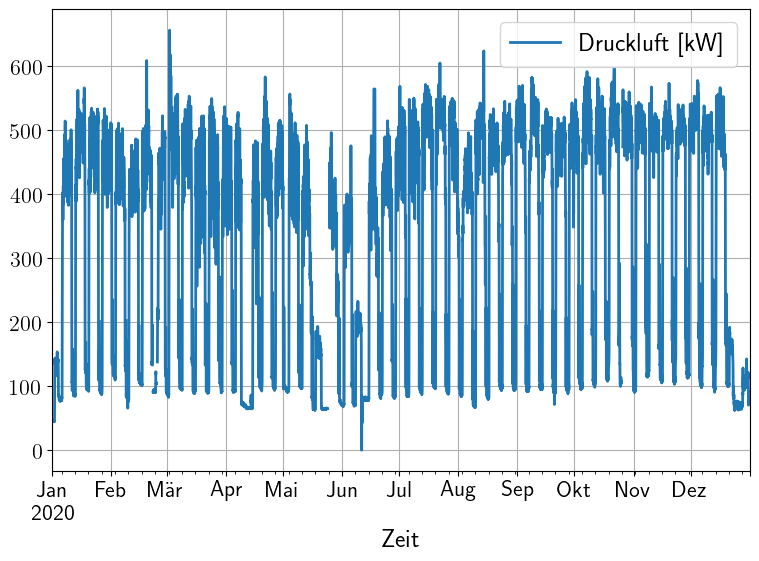

In [24]:
pt = r'../data/Druckluft.csv'
df = pd.read_csv(pt)
df['Zeit'] =  pd.to_datetime(df['zeitstempel'], format='%Y-%m-%d %H:%M:%S')
df = df.set_index('Zeit')
df = df.rename(columns = {"DLuft kW": "Druckluft [kW]"})
df['Druckluft [kW]'] = df['Druckluft [kW]'].apply(lambda x: np.where(x > 25000, np.nan, x))
df.plot(y='Druckluft [kW]', grid=True, figsize=(9,6))
plt.show()

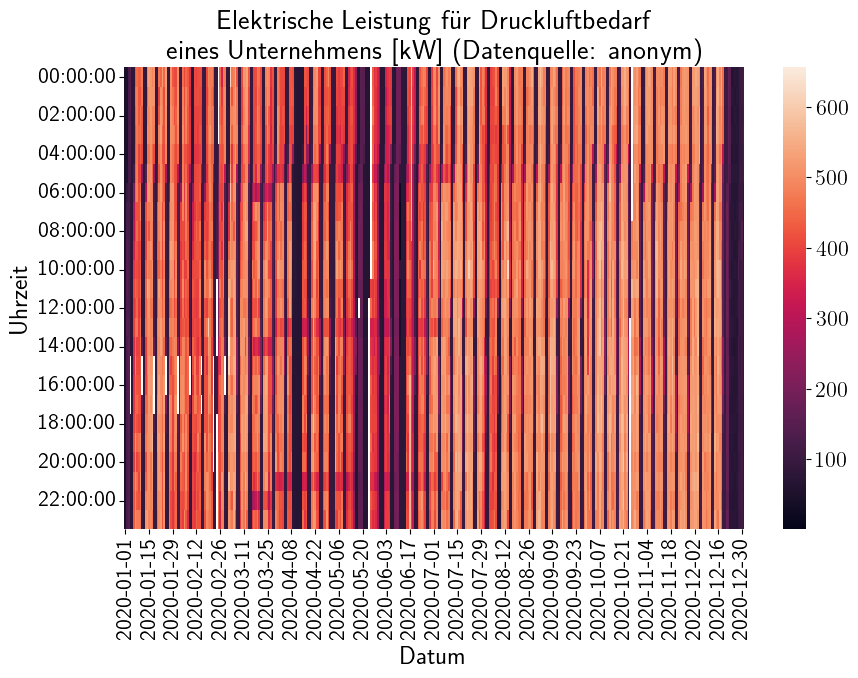

In [25]:
hm_df = pd.DataFrame({'Druckluft [kW]': df['Druckluft [kW]']})
hm_df['Datum'] = df.index.date
hm_df['Uhrzeit'] = df.index.time
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(hm_df.pivot(index = 'Uhrzeit', columns = 'Datum', values = 'Druckluft [kW]'))
plt.title('Elektrische Leistung für Druckluftbedarf \neines Unternehmens [kW] (Datenquelle: anonym)')
plt.show()

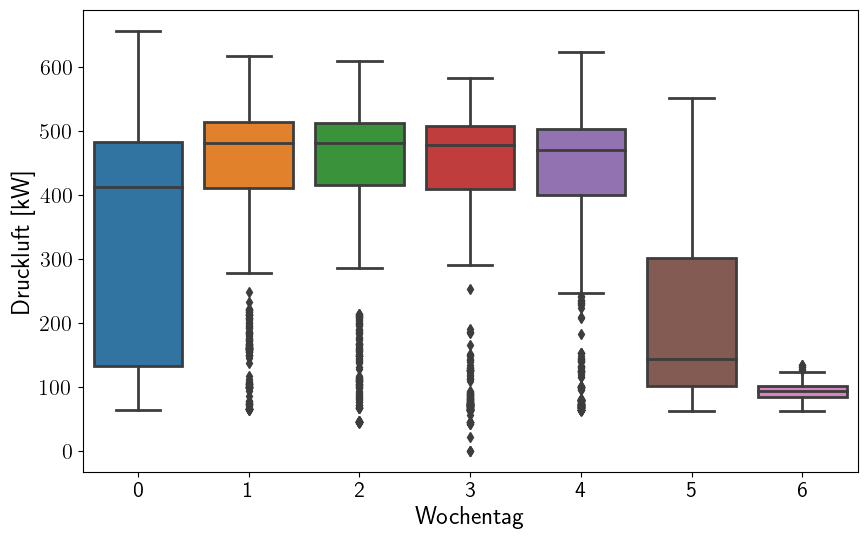

In [26]:
df['Wochentag'] = df.index.weekday
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(data = df, x = 'Wochentag', y= 'Druckluft [kW]')
plt.show()

## Druckluft kann vielseitige Funktionen erfüllen

Druckluftfunktionen {cite:p}`muller_energieeffiziente_2009`:
- **Arbeitsluft (Pneumatik)**: pneumatische Antriebe bzw. Aktoren (Druckluftzylinder, -motoren, -ventile) führen mechanische Bewegungen schnell, kraftvoll und präzise aus, verursachen keinen Funkenschlag ($\to$ Lackierbetriebe), Investition oft deutlich günstiger als elektrische Antriebe
- **Aktivluft**: Druckluft als Arbeits-, Transport- oder Hilfsmedium (Reinigen von Flächen und Werkstücken, Blasformen von Kunststoffbehältern, Blasen von Schüttgut in Rohrleitungen, Rohrpost, Schießen von Webschiffchen, Vereinzeln von Papierseiten in Druckmaschinen)
- **Luftlagerung**: z. B. in Präzisionsinstrumenten zur Entkopplung von Vibrationen des Untergrunds
- **Sperrluft**: z. B. rotierende Teile in Werkzeugmaschinen gegen feststehende Teile abdichten $\to$ Kühlschmierstoffemulsion verunreinigt nicht Maschinenantrieb und -getriebe
- **Prozessluft**: chemischer bzw. chemisch-physikalischer Reaktionspartner (Fermentation, Klärwerke, Brauereien)

### Zylinder, Ventile, Motoren bewegen

- Zylinder bewegen: Druckluft einströmen / ausströmen lassen
- Ventil für Druckluft: ebenfalls mit Druckluft betrieben
- auch Motoren lassen sich mit Druckluft betreiben
- Vorteile: explosionsgeschützt und luftgekühlt

| **Einfachwirkender Zylinder** | **Doppeltwirkender Zylinder** |
|---|---|
|<a title="I, RainerB., CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Einfachwirkender_Zylinder_funktionsprinziep.gif"><img width="200" alt="Einfachwirkender Zylinder funktionsprinziep" src="https://upload.wikimedia.org/wikipedia/commons/9/90/Einfachwirkender_Zylinder_funktionsprinziep.gif"></a>|<a title="User:RainerB., Public domain, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Doppelwirkender_Zylinder_Funktionsprinziep.gif"><img width="200" alt="Doppelwirkender Zylinder Funktionsprinziep" src="https://upload.wikimedia.org/wikipedia/commons/8/88/Doppelwirkender_Zylinder_Funktionsprinziep.gif"></a> |

### Aktivluft für Prozesse bereitstellen

<a title="Nicole Gordine, CC BY 3.0 &lt;https://creativecommons.org/licenses/by/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Plastic_bottle.jpg"><img width="256" alt="Plastic bottle" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Plastic_bottle.jpg/256px-Plastic_bottle.jpg"></a>

### Gegenstände transportieren

Die Rohrpost (im Bild) ist nicht mehr sehr häufig anzutreffen. Aus Energieeffizienzerwägungen heraus ist der Transport mit Druckluft nur in explosionsgefährdeten Bereichen und für Gegenstände geringer Baugröße mit niedrigem Gewicht sinnvoll {cite:p}`jens_hesselbach_praxisleitfaden_2009`.

## Druckluftsystem

### Überblick

Diagramm nach {cite:p}`muller_energieeffiziente_2009`, {cite:p}`kaser_kompressoren_se_drucklufttechnik_nodate` und {cite:p}`nahhas1_hobusch_musteraufstellungsskizze_2021`
- ACHTUNG: Fehlerhaft iim Diagramm: aufbereitetes Kondensat geht nicht in den Kompressor zurück, sondern es kommt auch vom Kompressor Kondensat zur Kondensataufbereitung und wird dort dann in Richtung Abwasser / Entsorgung Reststoffe geleitet

![Druckluftsystem Aufbauschema](../img/druckluftsystem.png)

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Welche Potenziale für Energieeffizienz sind in so einem System?
</div>

*Antwort:...*

### Kompressor(en)

<a title="Grikalmis at German Wikipedia, Public domain, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Kolbenkompressor.jpg"><img width="512" alt="Kolbenkompressor" src="https://upload.wikimedia.org/wikipedia/commons/c/c0/Kolbenkompressor.jpg"></a>

Der Kompressor verdichtet die Luft. Er hat in der Regel einen elektrischen Motor, um diese Arbeit zu verrichten. Es gibt unterschiedliche Bauformen. Schraubenkompressoren sind eine häufige Bauform in Druckluftsystemen. Bei der Verdichtung der Luft entsteht Abwärme.

Eine Kaskadensteuerung der Kompressoren ermöglicht es, dass diese im optimalen Betriebspunkt arbeiten: z. B. sorgt einer oder mehrere Kompressoren für die Erzeugung des Grundlastbedarfs und zusätzlich bedient ein oder mehrere drehzahlgeregelte Kompressoren die Lastspitzen {cite:p}`jens_hesselbach_praxisleitfaden_2009`, {cite:p}`daniela_romer_branchenenergiekonzept_2012`.

Die Kompressorenabwärme lässt sich in vielen Betrieben nutzen (s.u.) {cite:p}`daniela_romer_branchenenergiekonzept_2012`.

Zudem lässt sich die (oft ölhaltige) Kompressorabluft als Verbrennungsluft weiternutzen {cite:p}`daniela_romer_branchenenergiekonzept_2012`.

### Trockner, Filter

Ein Druckluftkältetrockner entzieht der komprimierten Luft die kondensierende Feuchtigkeit.

Trockner und Filter verursachen Druckverluste und erhöhen somit den Energiebedarf. Es ist daher wichtig, die Druckluftqualität so hoch wie nötig und so niedrig wie möglich einzustellen und auch regelmäßig an den Bedarf zu adaptieren {cite:p}`jens_hesselbach_praxisleitfaden_2009`. Filter sind oft genug zu tauschen {cite:p}`daniela_romer_branchenenergiekonzept_2012`.

Sinnvoll sind geregelte Kältetrockner, die nur bei Bedarf (Druckluft wird gerade erzeugt, Luft feucht) trocknen {cite:p}`daniela_romer_branchenenergiekonzept_2012`.

### Druckluftspeicher

<a title="Sensenschmied, CC BY-SA 3.0 &lt;https://creativecommons.org/licenses/by-sa/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Kompressorstation_mit_Druckluftspeicher.jpg"><img width="256" alt="Kompressorstation mit Druckluftspeicher" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Kompressorstation_mit_Druckluftspeicher.jpg/256px-Kompressorstation_mit_Druckluftspeicher.jpg"></a>

Eine Form der mechanischen Energiespeicher sind **Druckluftspeicher**: Sie speichern Luft unter hohem Druck in Behältnissen, Tanks oder natürlichen Kavernen. Die Druckdifferenz zur Umgebungsluft ergibt den Energieinhalt {cite:p}`michael_nentwich_zwischenspeicher_2019`. {cite:p}`brauner_systemeffizienz_2019-1` nennt als sinnvollen Zeitbereich für die Energiespeicherung in mit Druckluft Stunden bis Monate, bezieht sich jedoch auf Großspeicher mit mehreren 100 MW Leistung und favorisiert aufgrund des höheren Wirkungsgrades die adiabatische Nutzung.

Die ideale Speicherauslegung ermöglicht die optimale Energieeffizienz eines Druckluftsystems {cite:p}`jens_hesselbach_praxisleitfaden_2009`. Detailliertere Infos dazu finden sich z. B. in {cite:p}`druckluft-effizientde_fakten_2003`.

### Druckluftrohre

Weniger Druckverluste und damit weniger Energieverluste entstehen bei kurzen, geradlinigen Leitungsverläufen bzw. Leitungsbögen mit weitem Radius {cite:p}`schenk_fabrikplanung_2014`, {cite:p}`jens_hesselbach_praxisleitfaden_2009`.

Auch Druckverlustearme Komponenten (Leitungen mit geringer Rauheit, nicht zu kleinem Querschnitt) und strömungsoptimierte Druckluftwerkzeuge reduzieren Druckverluste {cite:p}`petermann_erfolgreiches_2018`. Dazu gehören auch leckagearme Armaturen, Schnellkopplungen mit hoher Qualität und der Einsatz elektrischer Kondensatableiter {cite:p}`jens_hesselbach_praxisleitfaden_2009`.

Beispiel: Greifersysteme handhaben Komponenten in automatisierten Montageumgebungen. Eine Ventilinsel mit längeren Zuleitungen steuert penumatische Aktoren für diese Greifmodlue. Werden Mikroventile eingesetzt, so können die Aktoren dezentral reguliert werden (da kleinbauender). Die direkte Ansteuerung ermöglicht eine reduzierte Taktzeit und somit auch einen geringeren Druckluftverbrauch um bis zu 90% {cite:p}`dana_kralisch_vdi_2015`.

Absperrarmaturen ermöglichen es, ungenutzte Teilstränge des Druckluftrohrsystems abzustellen {cite:p}`petermann_erfolgreiches_2018`. Für selten benutzte Verbraucher sind sie daher empfehlenswert {cite:p}`jens_hesselbach_praxisleitfaden_2009`, {cite:p}`daniela_romer_branchenenergiekonzept_2012`.

Leckagen suchen {cite:p}`petermann_erfolgreiches_2018`:
- wenn es ruhig ist (Wochenende, Feierabend) nach Gehör (größere Leckagen zischen)
- mit akustischen Leckagesuchgeräten die Druckluftinstallation abfahren
- Leckagesuchspray (nicht geeignet für Nahrungsmittelproduktion)

Messung der Grundlast {cite:p}`jens_hesselbach_praxisleitfaden_2009`: wenn gerade keine Druckluft abgenommen wird, Kompressor Nenndruck aufbauen lassen {cite:p}`petermann_erfolgreiches_2018`

\begin{equation}
\dot{V_{\text{Leckage}}} = V_{\text{Behälter}} \cdot (p_{\text{Beginn}} - p_{\text{Ende}}) /t    
\end{equation}

wenn Menge hoch, dann Leckagen orten und beheben

Leckagen zu reduzieren ist eine der großen Einsparmöglichkeiten bei Druckluftsystemen {cite:p}`daniela_romer_branchenenergiekonzept_2012` und ist ein immer wiederkehrender Wartungsaufwand. Das US Department of Energy beziffert die Einsparpotenziale alleine bei der Leckagereduktion auf bis zu 30% {cite:p}`chris_beals_improving_2003`, {cite:p}`us_department_of_energy_energy_2004`. Natürlich hängt es davon ab, wie gut das System vor der Lecksuche war, wie viel dann an Einsparung möglich ist.

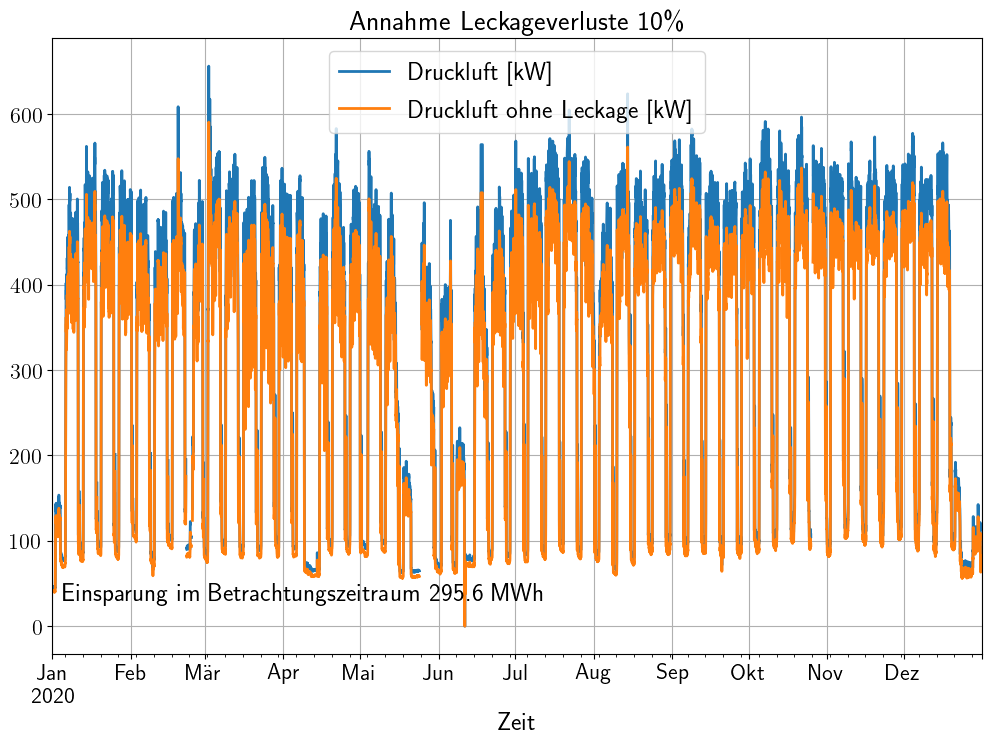

In [27]:
df['Druckluft ohne Leckage [kW]'] = 0.9*df['Druckluft [kW]']
df.plot(y=['Druckluft [kW]','Druckluft ohne Leckage [kW]'], title='Annahme Leckageverluste 10\%', figsize=(12,8))
orig_cons = df['Druckluft [kW]'].sum(skipna=True)
new_cons = df['Druckluft ohne Leckage [kW]'].sum(skipna=True)
dif_cons = orig_cons-new_cons
plt.text(df.index[100],30,'Einsparung im Betrachtungszeitraum '+str(np.round(1e-3*dif_cons,1))+' MWh', fontsize='18')
plt.grid()
plt.show()
# zusätzliche Annahme
# standby = 50 # kW (Annahme)
# df['Druckluft ohne Leckage [kW] Standby'] = df['Druckluft [kW]'] - standby
# wie viel Prozent ergibt das?

## Systemische Verbesserungen der Energieeffizienz von Druckluft

Drucklust ist allgemein sehr ineffizient, nur ca. 5% der eingesetzten Primärenergie stellt Druckluft als mechanische Energie zur Verfügung {cite:p}`jens_hesselbach_praxisleitfaden_2009`, {cite:p}`petermann_erfolgreiches_2018`.

### Druckluftbedarf reduzieren

Jeweils zu prüfen ist, welche Bedarfe sich zumindest teilweise ersetzen lassen:
- Fettschmierung von Spindel und Wälzführungen **ersetzt** Druckluft {cite:p}`schenk_fabrikplanung_2014`
- Dichtungen **ersetzen** Sperrluft am Tisch {cite:p}`schenk_fabrikplanung_2014`
- Elektrische Komponenten (z. B. Pumpen, Roboter) **ersetzen** pneumatische Komponenten, sofern technologisch und sicherheitstechnisch (Explosionsschutz, Hydrauliköl) akzeptabel {cite:p}`petermann_erfolgreiches_2018`, {cite:p}`daniela_romer_branchenenergiekonzept_2012`, {cite:p}`dehning_steigerung_2017`
- Sorptionstrocknung **ersetzt** Drucklufttrocknung {cite:p}`jens_hesselbach_praxisleitfaden_2009`
- Absaugen **ersetzt** Reinigen mit Druckluft {cite:p}`jens_hesselbach_praxisleitfaden_2009`
- Sprühkühlung **ersetzt** Druckluftkühlung {cite:p}`jens_hesselbach_praxisleitfaden_2009`

Lässt sich der Druckluft-Betriebsdruck im Rohrsystem reduzieren, so verringert sich entsprechend der Energiebedarf {cite:p}`schenk_fabrikplanung_2014`, {cite:p}`petermann_erfolgreiches_2018`, {cite:p}`daniela_romer_branchenenergiekonzept_2012`. Jedes bar mehr kostet zwischen 6 und 10% mehr Energie {cite:p}`jens_hesselbach_praxisleitfaden_2009`. Eventuell ist es auch sinnvoll, mehrere Druckbänder vorzuhalten.

Eine dezentrale Drucklufterzeugung ist bei langen Leitungen in der Regel energieeffizienter, erschwert jedoch die Abwärmenutzung, die ein zentrales System (s.u.) ggf. weitaus effizienter machen kann als mehrere dezentrale Systeme {cite:p}`jens_hesselbach_praxisleitfaden_2009`.

Zudem ist es sinnvoll, jedes Gerät daraufhin zu überprüfen, ob der Druckluftbedarf reduziert werden kann:
- Druck am Eingang reduzieren (ggf. Druckminderer so einstellen, dass niedrigerer Eingangsdruck ausreicht) {cite:p}`jens_hesselbach_praxisleitfaden_2009`
- Filter ggf. durch strömungsärmere Variante ersetzen (oder überhaupt mal wieder tauschen) {cite:p}`jens_hesselbach_praxisleitfaden_2009`

Während Betriebsferien o.ä. ist eine Abschaltung des gesamten Druckluftsystems in Erwägung zu ziehen {cite:p}`daniela_romer_branchenenergiekonzept_2012` oder mit einer Regelung der Kompressoren der Bedarf zu minimieren {cite:p}`dehning_steigerung_2017`.

### Energieverluste in einem Druckluftsystem aus dem Jahr 2000

Werte aus {cite:p}`muller_energieeffiziente_2009`:

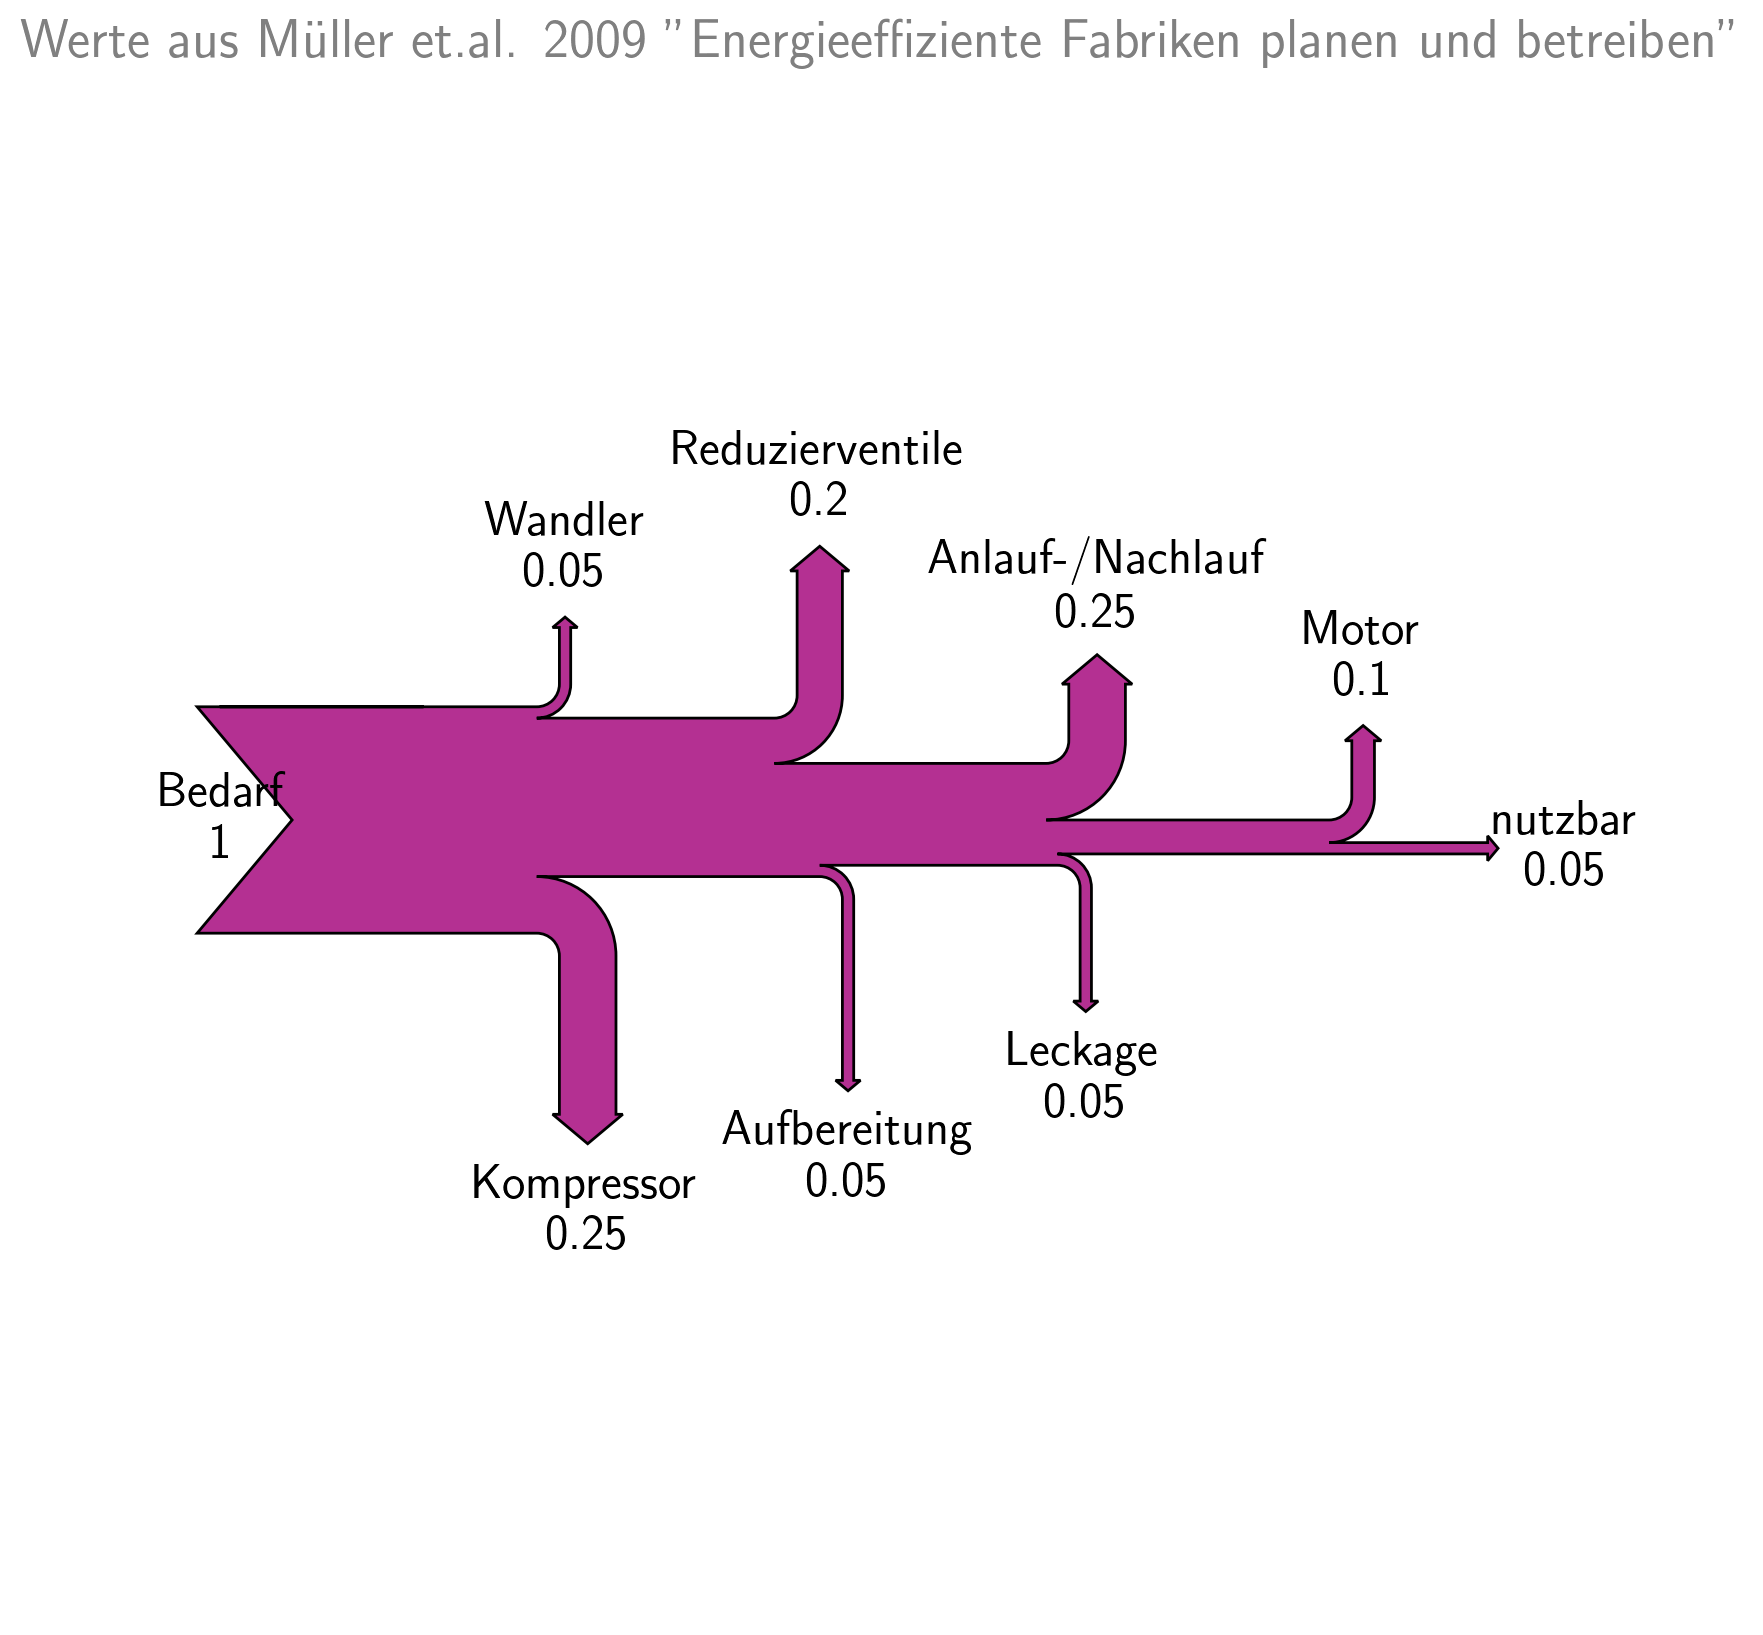

In [28]:
fig, ax = plt.subplots(figsize = [10,10], dpi=200)
Sankey(ax=ax, flows=[1,-.05,-.05,-.05,-.2,-.05,-.25,-.25,-.1],
    labels=['Bedarf','nutzbar','Wandler','Leckage',
        'Reduzierventile','Aufbereitung','Anlauf-/Nachlauf',
        'Kompressor','Motor'],
    orientations=[0,0,1,-1,1,-1,1,-1,1], facecolor='#B43092',
    trunklength=2.5, pathlengths=[.1,.5,.35,.6,.65,.9,.35,.8,.35], offset=.3,
    rotation=0, gap=1).finish()
plt.axis('off')
plt.title('Werte aus Müller et.al. 2009 "Energieeffiziente Fabriken planen und betreiben"', color='gray')
plt.show()

### Energieverluste in einem optimierten Druckluftsystem mit Abwärmenutzung

{cite:p}`petermann_erfolgreiches_2018` Potenzial Wärmerückgewinnung 85% bei Druckluft (Raumheizung, Brauchwasser, ggf. doppelwandige Wärmetauscher in Lebensmittelindustrie)

Werte aus {cite:p}`hulsmann_eneffah_2012`:

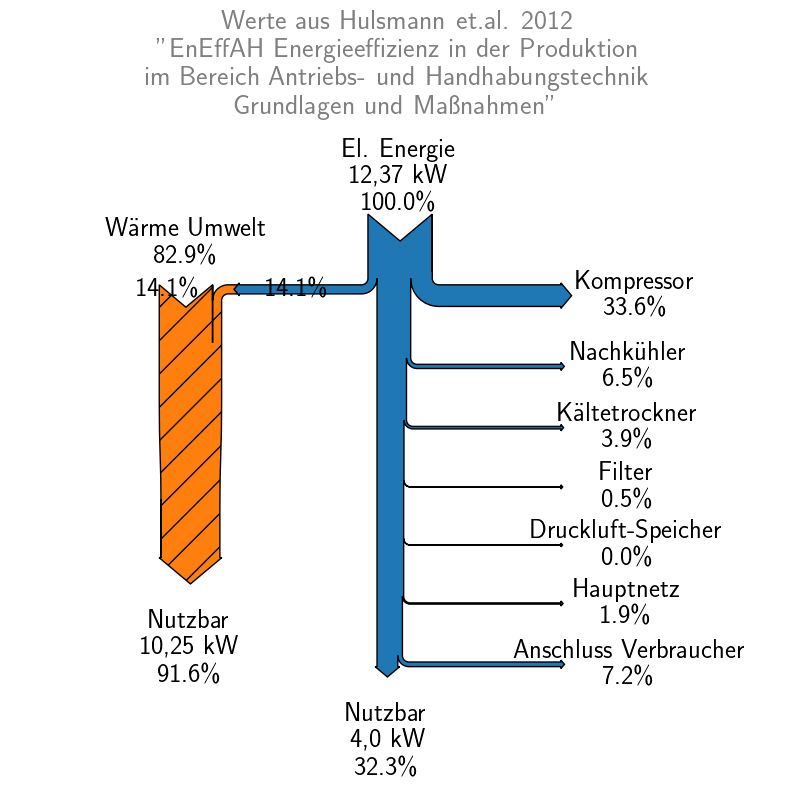

In [29]:
#rcParams.update({'figure.autolayout': True})
plt.rcParams.update({'font.size':19})

plt.rcParams["figure.figsize"] =[10,8]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])
flows = [100, -14.1, -33.6, -6.5, -3.9, -.5,-.01,-1.9,-7.2,-32.3]
sankey = Sankey(ax=ax, unit='\%',scale=.01,format='%.1f',offset=1,gap=.9)
sankey.add(flows=flows,
           trunklength=2,
           rotation=-90,
           label='Elektrische Energie',
           labels=['El. Energie\n12,37 kW','','Kompressor','Nachkühler','Kältetrockner','Filter','Druckluft-Speicher','Hauptnetz','Anschluss Verbraucher','Nutzbar\n4,0 kW'],
           pathlengths=2,
           orientations=[0, -1, 1, 1, 1, 1, 1, 1, 1,0])
sankey.add(flows=[100*10.25/12.37, 14.1, 100*10.25/12.37-14.1*12.37], label='Wärme',
           labels=['Wärme Umwelt','','Nutzbar\n10,25 kW'],
           trunklength=5,
           orientations=[0, 1, 0], prior=0, connect=(1, 1))
diagrams = sankey.finish()
diagrams[-1].patch.set_hatch('/')

plt.axis('off')
plt.title('Werte aus Hulsmann et.al. 2012 \n"EnEffAH Energieeffizienz in der Produktion \nim Bereich Antriebs- und Handhabungstechnik \nGrundlagen und Maßnahmen" \n',color='gray')
plt.show()

## Drucklufterzeugung auf dezentrale, erneuerbare Erzeugung anpassen

{cite:p}`bank_energieflexibel_2021` schlägt vor, Speicher so auslegen, dass Überschussstrom übernommen werden kann. Eine Luftzerlegungsanlage (die ähnlich wie eine Druckluftstation funktioniert) kann z. B. Stickstoff im Hochdrucktank speichern, welches zusammen mit Wasserstoff als Schutzgas dient. So kann der Speicher Bedarfsschwankungen ausgleichen. In der Regel ist die reglementierende Dauer für die Auslegung des Speichers eine Arbeitswoche.

Im obigen Zahlenbeispiel treffen wir stark vereinfachte Annahmen:

- Wenn die Solarerzeugung größer ist als ein bestimmter Wert, dann besteht Überschuss (genauer wird es, wenn man das Erzeugungsprofil mit einem anderen realen Lastprofil vergleicht)

In [30]:
morepv = 550 # bei dieser kW-Zahl und oberhalb existiert PV-Überschuss

Das Erzeugungsprofil im Datensatz stammt aus einer sehr kleinen Photovoltaikanlage. Nun wird angenommen, dass eine sehr viel größere Photovoltaikanlage im Einsatz ist.

In [31]:
largerpvfactor = 3 # sovielfacher Ertrag
df['PV [kW]'] = largerpvfactor*df['PV']

In [32]:
df.loc[df['PV [kW]']>morepv,'PV on'] = 1
df['PV on'] = df['PV on'].fillna(0) # Zeiten mit PV-Überschuss
'PV-Überschuss-Strom wird während {:.2f}% der Zeit produziert'.format(df['PV on'].sum()/df['PV on'].count()*100)

'PV-Überschuss-Strom wird während 16.88% der Zeit produziert'

Jetzt nehmen wir an, dass während Zeiten **ohne Überschuss** ein Teil der Druckluft aus dem Speicher kommt und es somit reicht, nicht 100% des Druckluftbedarfs, sondern weniger zu erzeugen (`reduced_production`) und dass während Zeiten **mit Überschuss** entsprechend mehr produziert wird (`increased_production`):

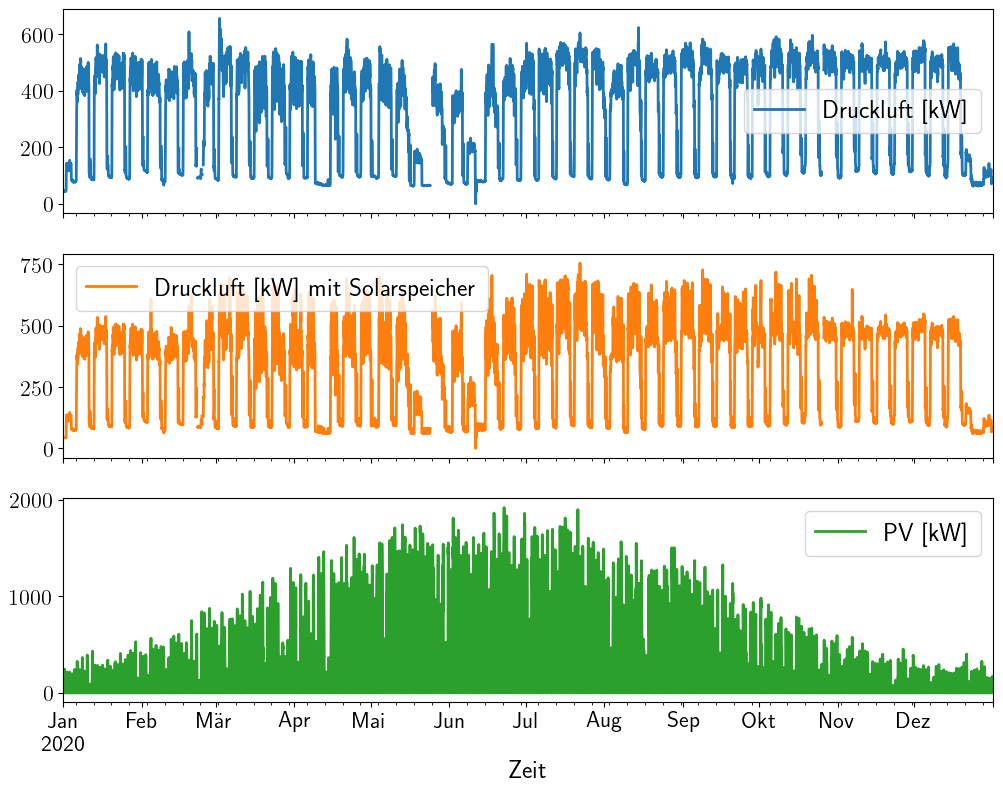

In [33]:
reduced_production = 0.95
increased_production = 1.25
df.loc[df['PV on']==1, 'production factor'] = increased_production
df['PV [kW]'] = df['PV [kW]'].interpolate()
df['production factor'] = df['production factor'].fillna(reduced_production)
df['Druckluft [kW] mit Solarspeicher'] = df['Druckluft [kW]']*df['production factor']
df.plot(subplots= True, y=['Druckluft [kW]', 'Druckluft [kW] mit Solarspeicher', 'PV [kW]'], figsize=(12,9))
plt.show()
# eigentlich müsste hier als Speicher modelliert werden
# wie ändert sich die Residuallast aus dem Netz, wenn Solardruckluft genutzt wird?
# Speicherverluste?
# CO2-Fußabdruck?

Um diese Rechnung zu plausibilisieren, ist es nötig, zu berechnen, wie viel Energie aus der Solaranlage kommt und ob diese mit der für die Druckluft verwendeten Energie übereinstimmen kann. Außerdem ist es wichtig, zu überprüfen, ob der Wirkungsgrad des Systems plausibel bleibt und dies übers gesamte Jahr hinweg.

Falls dies nicht der Fall ist, müssen die Faktoren `reduced_production` und `increased_production` nachjustiert werden, bis plausible Energiesummen und Wirkungsgrade entstehen.

```{bibliography}
:filter: docname in docnames
```